In [1]:
!pip install datasets
!pip install matplotlib
!pip install WordCloud
!pip install networkx[default]

In [2]:
!pip install pathlib 

from google.colab import drive
from pathlib import Path
import pandas as pd

drive.flush_and_unmount()
drive.mount('/content/drive')
root_dir = '/content/drive/MyDrive/839-Project'

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
import datasets as dt

configs = dt.get_dataset_config_names("amazon_us_reviews")
print(configs)

In [ ]:
dataset_builder = dt.load_dataset_builder("amazon_us_reviews",'Mobile_Apps_v1_00')
#print(dataset_builder.cache_dir)
print(dataset_builder.info.features)
print(dataset_builder.info.splits)
dataset = dt.load_dataset('amazon_us_reviews', 'Mobile_Apps_v1_00', split='train')

In [ ]:
products = dataset.unique('product_title')
print(len(dataset['product_title']))
print(len(products))
product_ids = dataset.unique('product_id')
print(len(dataset['product_id']))
print(len(product_ids))

In [ ]:
df = dataset.to_pandas()
prods = df.product_title
ix = df.product_title.str.len().sort_values().index
print(prods.reindex(ix))

In [ ]:
from datetime import datetime

print(min(dataset['review_date']))
print(max(dataset['review_date']))

start_date = datetime(2008, 1, 1)
close_date = datetime(2016, 1, 1)

review_date = datetime.strptime(dataset[0]['review_date'], '%Y-%m-%d')
print (review_date >= start_date and review_date < close_date)

In [ ]:
products = dataset['product_title']
maps_products = list(set(list(filter(lambda product: 'Spotify' in product, products))))
maps_products.sort(key=lambda item: len(item))
print(maps_products)
print(len(maps_products))

In [ ]:
google_maps_reviews = dataset.filter(lambda review: review['product_title'] == 'Google Maps')
google_maps_reviews.shape
print(google_maps_reviews.column_names)
google_maps_reviews.to_csv(Path(root_dir + '/google-maps-reviews.csv'))

In [ ]:
bing_maps_reviews = dataset.filter(lambda review: review['product_title'] == 'Bing Maps')
bing_maps_reviews.shape
print(bing_maps_reviews.column_names)
bing_maps_reviews.to_csv(Path(root_dir + '/bing-maps-reviews.csv'))

In [ ]:
spotify_music_reviews = dataset.filter(lambda review: review['product_title'] == 'Spotify Music')
spotify_music_reviews.shape
print(spotify_music_reviews.column_names)
spotify_music_reviews.to_csv(Path(root_dir + '/spotify-music-reviews.csv'))

In [ ]:
gm_reviews = pd.read_csv(Path(root_dir + '/google-maps-reviews.csv'), index_col=0)
print(gm_reviews.columns)
gm_reviews.drop(['marketplace', 'product_id', 'product_parent', 'product_category', 'vine'], axis=1)
gm_reviews.to_csv(Path(root_dir + '/google-maps-reviews.csv'), index=False)

In [ ]:
bing_reviews = pd.read_csv(Path(root_dir + '/bing-maps-reviews.csv'), index_col=0)
print(bing_reviews.columns)
bing_reviews.drop(['marketplace', 'product_id', 'product_parent', 'product_category', 'vine'], axis=1)
bing_reviews.to_csv(Path(root_dir + '/bing-maps-reviews.csv'), index=False)

In [ ]:
spotify_reviews = pd.read_csv(Path(root_dir + '/Spotify-Music/spotify-music-reviews.csv'), index_col=0)
print(spotify_reviews.columns)
spotify_reviews.drop(['marketplace', 'product_id', 'product_parent', 'product_category', 'vine'], axis=1)
spotify_reviews.to_csv(Path(root_dir + '/spotify-music-reviews.csv'), index=False)

In [ ]:
spotify_reviews = pd.read_csv(Path(root_dir + '/Spotify-Music/spotify-music-reviews.csv'), index_col=0)
print(spotify_reviews.columns)

In [ ]:
stances = ["AGAINST", "FAVOR", "NONE", "UNKNOWN"]
class_nums = {s: i for i, s in enumerate(stances)}
print(class_nums)

In [3]:
!pip install keybert

     |████████████████████████████████| 79 kB 4.9 MB/s 
     |████████████████████████████████| 231 kB 16.2 MB/s 
     |████████████████████████████████| 51 kB 7.8 MB/s 
     |████████████████████████████████| 4.0 MB 40.8 MB/s 
     |████████████████████████████████| 1.2 MB 47.8 MB/s 
     |████████████████████████████████| 880 kB 37.8 MB/s 
     |████████████████████████████████| 6.6 MB 33.1 MB/s 
     |████████████████████████████████| 596 kB 51.8 MB/s 
  Created wheel for keybert: filename=keybert-0.5.1-py3-none-any.whl size=21332 sha256=14137e9f1a305f02fecf8f16b404b54977ca31a7e9f4ffbcd006c1d5c3989ebe
  Stored in directory: /root/.cache/pip/wheels/8e/95/c5/f5ceed2a9f9e80bc1a706a10a6fb03d726df7a3dd11800a58b
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=b9f8e1eb2919c003c6ec45d03137a7fbf573bf2a837397dbee2c2d11e8fd47a1
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c

In [4]:
from keybert import KeyBERT

doc = """
This app is simply amazing. It's musical heaven. Almost any song or artist you can think of, right at your fingertips. A lot of people use it similarly to Pandora; they put it on a “station” or “mix” and that feature is decent. The algorithms aren't great honestly. It works best if you use it similarly to iTunes. Finding the songs, artists, or albums you like and putting them into playlists. You can have as many different playlists as you want. And for people that don't want to pay for premium service, you don't have to. You get all the aforementioned features with the free version. The premium version is far too expensive, and the only benefits I'm aware of are higher quality audio, offline capabilities, and unlimited skips. But with an app so spectacular, you don't need to pay $9.99 monthly for such petty benefits. Also, people that complain about having to create an account through Facebook or email, they don't email you constantly or post all over your Facebook. You can set your Facebook to disallow posts from spotify, and as far as email, I've had my account for 5 months and I don't think they have ever emailed me. Bottom line: this is a must-download for music lovers! Hope my review was helpful. :)
"""

kw_model = KeyBERT()
keywords = kw_model.extract_keywords(doc, keyphrase_ngram_range=(1, 5),
                    use_maxsum=True, nr_candidates=20, top_n=5)
print(keywords)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

[('aforementioned features free version premium', 0.4866), ('people use similarly pandora station', 0.4904), ('app simply amazing musical', 0.5028), ('facebook disallow posts spotify far', 0.5104), ('best use similarly itunes finding', 0.5228)]


In [5]:
!pip install git+https://github.com/LIAAD/yake
import yake

  Cloning https://github.com/LIAAD/yake to /tmp/pip-req-build-_hf3hqxm
  Running command git clone -q https://github.com/LIAAD/yake /tmp/pip-req-build-_hf3hqxm
     |████████████████████████████████| 132 kB 9.5 MB/s 
  Created wheel for yake: filename=yake-0.4.8-py2.py3-none-any.whl size=62565 sha256=a29bf4823ed6f2cb8ef6b5ea54c51ed88f51373d03798ddcc3a2d71a4675a581
  Stored in directory: /tmp/pip-ephem-wheel-cache-vdcfk2oh/wheels/52/79/f4/dae9309f60266aa3767a4381405002b6f2955fbcf038d804da
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp37-cp37m-linux_x86_64.whl size=73977 sha256=77be02a065eb71b03f8ef4e86da7daab73c911d665b9913433195969d0d85bd0
  Stored in directory: /root/.cache/pip/wheels/fe/99/4e/646ce766df0d070b0ef04db27aa11543e2767fda3075aec31b
Successfully built yake jellyfish


In [6]:
language = "en"
max_ngram_size = 5
deduplication_thresold = 0.6
deduplication_algo = 'seqm'
windowSize = 5
numOfKeywords = 10

kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None, stopwords=['Spotify'])
keywords = kw_extractor.extract_keywords(doc)
for kw, v in keywords:
  print("Keyphrase: ",kw, ": score", v)

Keyphrase:  simply amazing : score 0.05693622716275811
Keyphrase:  you : score 0.061019876172068714
Keyphrase:  This app is simply amazing : score 0.08112377311742261
Keyphrase:  and : score 0.08682474922698857
Keyphrase:  The : score 0.1023068129500139
Keyphrase:  for : score 0.13191322292949056
Keyphrase:  Facebook : score 0.1409598286129388
Keyphrase:  you can : score 0.19680171376315883
Keyphrase:  have : score 0.20256680260698942
Keyphrase:  can : score 0.20279151652507466


In [7]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
spotify_reviews = pd.read_csv(Path(root_dir + '/Spotify-Music/Spotify-Music-Reviews-Labeled.csv'), index_col=0, nrows=300)
print(spotify_reviews.columns)
print(spotify_reviews.shape)
spotify_reviews = spotify_reviews[spotify_reviews['library'].notna()]
#spotify_reviews = spotify_reviews.tail(50)
print(spotify_reviews.shape)

Index(['customer_id', 'review_id', 'product_id', 'product_parent',
       'product_title', 'product_category', 'star_rating', 'helpful_votes',
       'total_votes', 'vine', 'verified_purchase', 'review_headline',
       'review_body', 'review_date', 'library', 'personalization',
       'media player', 'ads'],
      dtype='object')
(300, 18)
(299, 18)


In [9]:
drop_list = ['customer_id', 'review_id', 'product_id', 'product_parent',  'product_title', 'product_category', 'star_rating', 'helpful_votes', 
             'total_votes', 'vine', 'verified_purchase', 'review_headline', 'review_date', 'personalization', 'media player', 'ads']

lib_pos_reviews = spotify_reviews.loc[spotify_reviews['library'].isin(['positive'])]
lib_neg_reviews = spotify_reviews.loc[spotify_reviews['library'].isin(['negative'])]
lib_pos_reviews.drop(drop_list, axis=1, inplace = True)
lib_neg_reviews.drop(drop_list, axis=1, inplace = True)

prsnl_pos_reviews = spotify_reviews.loc[spotify_reviews['personalization'].isin(['positive'])]
prsnl_neg_reviews = spotify_reviews.loc[spotify_reviews['personalization'].isin(['negative'])]
prsnl_pos_reviews.drop(drop_list, axis=1, inplace = True)
prsnl_neg_reviews.drop(drop_list, axis=1, inplace = True)

mp_pos_reviews = spotify_reviews.loc[spotify_reviews['media player'].isin(['positive'])]
mp_neg_reviews = spotify_reviews.loc[spotify_reviews['media player'].isin(['negative'])]
mp_pos_reviews.drop(drop_list, axis=1, inplace = True)
mp_neg_reviews.drop(drop_list, axis=1, inplace = True)

prm_pos_reviews = spotify_reviews.loc[spotify_reviews['ads'].isin(['positive'])]
prm_neg_reviews = spotify_reviews.loc[spotify_reviews['ads'].isin(['negative'])]
prm_pos_reviews.drop(drop_list, axis=1, inplace = True)
prm_neg_reviews.drop(drop_list, axis=1, inplace = True)

print('Library Reviews:- positive:' + str(lib_pos_reviews.shape) + ' negative:' + str(lib_neg_reviews.shape))
print('Personalization Reviews:- positive:' + str(prsnl_pos_reviews.shape) + ' negative:' + str(prsnl_neg_reviews.shape))
print('Music Player Reviews:- positive:' + str(mp_pos_reviews.shape) + ' negative:' + str(mp_neg_reviews.shape))
print('Premium Service Reviews:- positive:' + str(prm_pos_reviews.shape) + ' negative:' + str(prm_neg_reviews.shape))

Library Reviews:- positive:(121, 2) negative:(11, 2)
Personalization Reviews:- positive:(21, 2) negative:(17, 2)
Music Player Reviews:- positive:(84, 2) negative:(83, 2)
Premium Service Reviews:- positive:(16, 2) negative:(20, 2)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
language = "en"
max_ngram_size = 2
deduplication_thresold = 0.6
deduplication_algo = 'seqm'
windowSize = 5
numOfKeywords = 10
stoplist = stopwords.words('english')
stoplist.append('spotify')

kw_model = KeyBERT(model='all-MiniLM-L6-v2')
kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, 
                                     top=numOfKeywords, features=None, stopwords=stoplist)

In [14]:
pos_kws = {}
neg_kws = {}

pos_kws['library'] = []
lib_pos_keywords = ' '
lib_pos_reviews = lib_pos_reviews.reset_index()  # make sure indexes pair with number of rows
for index, row in lib_pos_reviews.iterrows():
    keyphrases = kw_model.extract_keywords(row['review_body'], keyphrase_ngram_range=(1, 5), use_maxsum=True, use_mmr=True, diversity=0.8, nr_candidates=20, top_n=5, stop_words='english')
    doc = ' '.join(list(zip(*keyphrases))[0])
    keywords = kw_extractor.extract_keywords(doc)
    pos_kws['library'].extend(list(zip(*keywords))[0])
    doc = ' '.join(list(zip(*keywords))[0])
    lib_pos_keywords = lib_pos_keywords + ' ' + doc

neg_kws['library'] = []
lib_neg_keywords = ' '
lib_neg_reviews = lib_neg_reviews.reset_index()  # make sure indexes pair with number of rows
for index, row in lib_neg_reviews.iterrows():
    keyphrases = kw_model.extract_keywords(row['review_body'], keyphrase_ngram_range=(1, 5), use_maxsum=True, use_mmr=True, diversity=0.8, nr_candidates=20, top_n=5, stop_words='english')
    doc = ' '.join(list(zip(*keyphrases))[0])
    keywords = kw_extractor.extract_keywords(doc)
    neg_kws['library'].extend(list(zip(*keywords))[0])
    doc = ' '.join(list(zip(*keywords))[0])
    lib_neg_keywords = lib_neg_keywords + ' ' + doc

pos_kws['personalization'] = []
prsnl_pos_keywords = ' '
prsnl_pos_reviews = prsnl_pos_reviews.reset_index()  # make sure indexes pair with number of rows
for index, row in prsnl_pos_reviews.iterrows():
    keyphrases = kw_model.extract_keywords(row['review_body'], keyphrase_ngram_range=(1, 5), use_maxsum=True, use_mmr=True, diversity=0.8, nr_candidates=20, top_n=5, stop_words='english')
    doc = ' '.join(list(zip(*keyphrases))[0])
    keywords = kw_extractor.extract_keywords(doc)
    pos_kws['personalization'].extend(list(zip(*keywords))[0])
    doc = ' '.join(list(zip(*keywords))[0])
    prsnl_pos_keywords = prsnl_pos_keywords + ' ' + doc

neg_kws['personalization'] = []
prsnl_neg_keywords = ' '
prsnl_neg_reviews = prsnl_neg_reviews.reset_index()  # make sure indexes pair with number of rows
for index, row in prsnl_neg_reviews.iterrows():
    keyphrases = kw_model.extract_keywords(row['review_body'], keyphrase_ngram_range=(1, 5), use_maxsum=True, use_mmr=True, diversity=0.8, nr_candidates=20, top_n=5, stop_words='english')
    doc = ' '.join(list(zip(*keyphrases))[0])
    keywords = kw_extractor.extract_keywords(doc)
    neg_kws['personalization'].extend(list(zip(*keywords))[0])
    doc = ' '.join(list(zip(*keywords))[0])
    prsnl_neg_keywords = prsnl_neg_keywords + ' ' + doc

pos_kws['music player'] = []
mp_pos_keywords = ' '
mp_pos_reviews = mp_pos_reviews.reset_index()  # make sure indexes pair with number of rows
for index, row in mp_pos_reviews.iterrows():
    keyphrases = kw_model.extract_keywords(row['review_body'], keyphrase_ngram_range=(1, 5), use_maxsum=True, use_mmr=True, diversity=0.8, nr_candidates=20, top_n=5, stop_words='english')
    doc = ' '.join(list(zip(*keyphrases))[0])
    keywords = kw_extractor.extract_keywords(doc)
    pos_kws['music player'].extend(list(zip(*keywords))[0])
    doc = ' '.join(list(zip(*keywords))[0])
    mp_pos_keywords = mp_pos_keywords + ' ' + doc

neg_kws['music player'] = []
mp_neg_keywords = ' '
mp_neg_reviews = mp_neg_reviews.reset_index()  # make sure indexes pair with number of rows
for index, row in mp_neg_reviews.iterrows():
    keyphrases = kw_model.extract_keywords(row['review_body'], keyphrase_ngram_range=(1, 5), use_maxsum=True, use_mmr=True, diversity=0.8, nr_candidates=20, top_n=5, stop_words='english')
    doc = ' '.join(list(zip(*keyphrases))[0])
    keywords = kw_extractor.extract_keywords(doc)
    neg_kws['music player'].extend(list(zip(*keywords))[0])
    doc = ' '.join(list(zip(*keywords))[0])
    mp_neg_keywords = mp_neg_keywords + ' ' + doc

pos_kws['premium service'] = []
prm_pos_keywords = ' '
prm_pos_reviews = prm_pos_reviews.reset_index()  # make sure indexes pair with number of rows
for index, row in prm_pos_reviews.iterrows():
    keyphrases = kw_model.extract_keywords(row['review_body'], keyphrase_ngram_range=(1, 5), use_maxsum=True, use_mmr=True, diversity=0.8, nr_candidates=20, top_n=5, stop_words='english')
    doc = ' '.join(list(zip(*keyphrases))[0])
    keywords = kw_extractor.extract_keywords(doc)
    pos_kws['premium service'].extend(list(zip(*keywords))[0])
    doc = ' '.join(list(zip(*keywords))[0])
    prm_pos_keywords = prm_pos_keywords + ' ' + doc

neg_kws['premium service'] = []
prm_neg_keywords = ' '
prm_neg_reviews = prm_neg_reviews.reset_index()  # make sure indexes pair with number of rows
for index, row in prm_neg_reviews.iterrows():
    keyphrases = kw_model.extract_keywords(row['review_body'], keyphrase_ngram_range=(1, 5), use_maxsum=True, use_mmr=True, diversity=0.8, nr_candidates=20, top_n=5, stop_words='english')
    doc = ' '.join(list(zip(*keyphrases))[0])
    keywords = kw_extractor.extract_keywords(doc)
    neg_kws['premium service'].extend(list(zip(*keywords))[0])
    doc = ' '.join(list(zip(*keywords))[0])
    prm_neg_keywords = prm_neg_keywords + ' ' + doc

KeyError: ignored

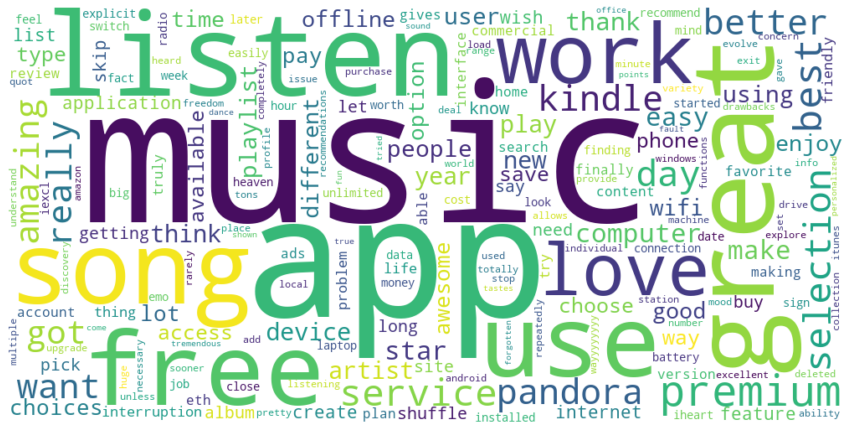

In [17]:
!pip install matplotlib==3.1.3
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1000, height = 500, collocations = False, background_color = 'white').generate(lib_pos_keywords)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(root_dir + '/library-positive-reviews.pdf', bbox_inches='tight')
plt.show()
plt.close()

wordcloud = WordCloud(width = 1000, height = 500, collocations = False, background_color = 'white').generate(lib_neg_keywords)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(root_dir + '/library-negative-reviews.pdf', bbox_inches='tight')
plt.show()
plt.close()

wordcloud = WordCloud(width = 1000, height = 500, collocations = False, background_color = 'white').generate(prsnl_pos_keywords)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(root_dir + '/personalization-positive-reviews.pdf', bbox_inches='tight')
plt.show()
plt.close()

wordcloud = WordCloud(width = 1000, height = 500, collocations = False, background_color = 'white').generate(prsnl_neg_keywords)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(root_dir + '/personalization-negative-reviews.pdf', bbox_inches='tight')
plt.show()
plt.close()

wordcloud = WordCloud(width = 1000, height = 500, collocations = False, background_color = 'white').generate(mp_pos_keywords)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(root_dir + '/music-player-positive-reviews.pdf', bbox_inches='tight')
plt.show()
plt.close()

wordcloud = WordCloud(width = 1000, height = 500, collocations = False, background_color = 'white').generate(mp_neg_keywords)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(root_dir + '/music-player-negative-reviews.pdf', bbox_inches='tight')
plt.show()
plt.close()

wordcloud = WordCloud(width = 1000, height = 500, collocations = False, background_color = 'white').generate(prm_pos_keywords)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(root_dir + '/premium-positive-reviews.pdf', bbox_inches='tight')
plt.show()
plt.close()

wordcloud = WordCloud(width = 1000, height = 500, collocations = False, background_color = 'white').generate(prm_neg_keywords)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(root_dir + '/premium-negative-reviews.pdf', bbox_inches='tight')
plt.show()
plt.close()

In [15]:
from collections import Counter
for target, keywords in pos_kws.items():
  unique_kws = Counter(keywords)
  print(target)
  print(len(list(unique_kws.keys())))

for key, value in neg_kws.items():
  unique_kws = Counter(value)
  print(key)
  print(len(list(unique_kws.keys())))  

library
1112
personalization
206
music player
788
premium service
157
library
98
personalization
160
music player
767
premium service
186


In [18]:
import networkx as nx


G1 = nx.Graph()
for target, keywords in pos_kws.items():
  keywords_counter = Counter(keywords)
  unique_keywords = list(keywords_counter.keys())
  G1.add_node(target)
  for keyword in unique_keywords:
    if G1.has_node(keyword) and G1.has_edge(target, keyword):
      G1[target][keyword]['weight'] = keywords_counter[keyword] + G1[target][keyword]['weight']
    elif G1.has_node(keyword):
      G1.add_edge(target, keyword, weight= (keywords_counter[keyword]), color='green')
    else:  
      G1.add_node(keyword)
      G1.add_edge(target, keyword, weight= (keywords_counter[keyword]), color='green')

G2 = nx.Graph()
for target, keywords in neg_kws.items():
  keywords_counter = Counter(keywords)
  unique_keywords = list(keywords_counter.keys())
  for keyword in unique_keywords:
    if G2.has_node(keyword) and G2.has_edge(target, keyword):
      G2[target][keyword]['weight'] = keywords_counter[keyword] + G2[target][keyword]['weight']
    elif G2.has_node(keyword):
      G2.add_edge(target, keyword, weight= (keywords_counter[keyword]), color='red')
    else:  
      G2.add_node(keyword)
      G2.add_edge(target, keyword, weight= (keywords_counter[keyword]), color='red')

In [19]:
nodes = ['music player']
print(set(pos_kws['music player']))
nodes.extend(list(set(pos_kws['music player'])))
print(len(nodes))
#nodes = nodes[1:31]
print(len(nodes))
edges = G1.edges(nodes)
print(len(edges))

{'app right', 'pick stars', 'album', 'big level', 'requesting playlist', 'recommendations based', 'right iexcl', 'charge unless', 'app pick', 'use app', 'best like', 'days app', 'kindle', 'download load', 'use features', 'application easy', 'consumer tell', 'want create', 'best', 'feature', 'crazy directions', 'like selection', 'day', 'allows choose', 'stars stars', 'song bellas', 'dad health', 'think permanently', 'heck complete', 'office use', 'free', 'fact second', 'shuffle', 'usually pandora', 'second enjoy', 'love making', 'member reliable', 'sonworth new', 'new', 'ads', 'like nice', 'kindle amazing', 'buy listen', 'really choose', 'advertising minimal', 'finally days', 'finally', 'fun work', 'love shuffle', 'number skips', 'xbox sucks', 'stumbled relieving', 'enjoy worrying', 'amazing listen', 'unique search', 'fact fully', 'btw listen', 'high resistance', 'make categorize', 'devices xbox', 'recommending long', 'popular selecting', 'tab date', 'katy perry', 'android devices', 'co

Graph Positive:- #Nodes:1271 #Edges:2263


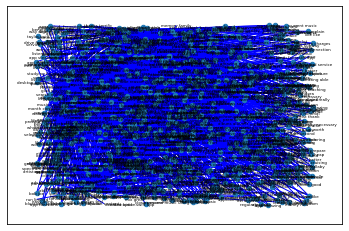

In [20]:
print('Graph Positive:- #Nodes:' + str(G1.number_of_nodes()) + ' #Edges:' + str(G1.number_of_edges()))


import matplotlib.pyplot as plt
pos = nx.random_layout(G1)
#labels = nx.get_edge_attributes(G1,'weight')

nx.draw_networkx(G1, pos, edge_color='blue', node_size=20, with_labels=True, font_size=4, nodelist=nodes, edgelist=edges)
#nx.draw_networkx_edge_labels(G1, pos, edge_labels=labels)
plt.savefig(root_dir + '/music-player-full-pos-network.png', dpi=300)